# Chapter 1. Probability and Counting
## 1.8 Introduction to R

### Vectors
To create a vector, we can use the _c_ command (to _combine_ or _concatenate_)

In [1]:
v <- c(3, 1, 4, 1, 5, 9)
sum(v)

[1] 23

In [2]:
max(v)

[1] 9

To access the _i_th entry of a vector _v_, use _v[i]_. _i_ in turn can also be a vector.

In [3]:
v[c(1, 3, 5)] # access the 1st, 3rd, and 5th elements of v

[1] 3 4 5

Specify elements to exclude by - operator

In [4]:
v[-(2:4)]  # exclude 2nd to 4th elements

[1] 3 5 9

### Component-wise operations
Many operations in R are interpreted _component-wise_, e.. 1/(1:10)^2 is a compact way to get the vector $(1, \frac{1}{2^2}, \frac{1}{3^2}, \cdots, \frac{1}{10^2})$

In [5]:
1/(1:10)^2

[1] 1.00000000 0.25000000 0.11111111 0.06250000 0.04000000 0.02777778
 [7] 0.02040816 0.01562500 0.01234568 0.01000000

### Factorial and binomial coefficients
We can compute $n!$ using _factorial(n)_ and $\binom{n}{k}$ using _choose(n,k)_. 

In [6]:
factorial(69)

[1] 1.711225e+98

In [7]:
choose(4,2)

[1] 6

### Sampling and simulation
The _sample_ command is a useful way of drawing random samples in _R_, e.g. _n <- 10; k <- 5; sample(n,k)_ generates an ordered random sample of 5 of the numbers from 1 to 10, without replacement, and with equal probabilitie given to each number. To sample with replacment instead, just ad in _replace = TRUE_:

In [8]:
n <- 10; k <- 5
sample(n, k)

[1] 4 1 2 3 5

In [9]:
sample(n, k, replace=TRUE)

[1] 9 8 4 6 4

sample from non-numeric vector, e.g. _letters_ (built-in vectors consisting of 26 lowercase letters in the English alphabet)

In [10]:
sample(letters, 7)

[1] "k" "m" "n" "g" "a" "c" "o"

specify general probabilities in a given sample, e.g. sample 3 numbers between 1 and 4, with replacement, and with 
probabilities given by the tuple(0.1, 0.2, 0.3, 0.4):

In [25]:
sample(4, 3, replace=TRUE, prob=c(0.1, 0.2, 0.3, 0.4))

[1] 3 3 1

### Example 1.6.4 de Montmort's matching problem
Consider a well-shuffled deck of $n$ cards, labelled $1$ through $n$. You flip over the cards one by one, saying the numbers $1$ through $n$ as you do so. You win the ame if, at some point, the number you say aloud is the same as the number on the card being flipped over (e.g. if the $7$th card in the deck has the label $7$). What is the probability of winning?

_Solution:_
Let $A_{i}$ be the event that the $i$th card in the deck has number $i$ written on it. We are interested in the probability of the union $A_{i} \cup \ldots \cup A_{n}$: as long as at least one of the cards has a number matching its position in the deck, you will win the game. (An ordering for which you lose is called a _derangement_.)

To find the probabiliity of the union, we will use **_inclusion-exclusion_**. First,

$$P(A_{i}) = \frac{1}{n}$$ for all $i$.

By the naÏve definition of probability, using the full sample space: there are $n!$ possible orderings of hte deck, _all equally likely_, and $(n-1)!$ of these are favourable to $A_{i}$ (fix the card numbered $i$ to be in the $i$th position in the deck, and then the remaining $n-1$ cards can be in any order). Another way to see this is by symmetry: the card numbered $i$ is equally likely to be in any of the $n$ positions in the deck, so it has probability $1/n$ of being in the $i$th spot. Second,

$$P(A_{i} \cap A_{j}) = \frac{(n-2)!}{n!} = \frac{1}{n(n-1)}$$

since we require the cards numbered $i$ and $j$ to be in the $i$th and $j$th spots in the deck and allow
the remaining $n-2$ cards to be in any order, so $(n-2)!$ out of $n!$ possibilities are favourable to $A_{i} \cap A_{j}$.
Similarly,
$$ P(A_{i} \cap A_{j} \cap A_{k}) = \frac{1}{n(n-1)(n-2)} $$.

and the pattern continues for intersections of 4 events, etc.

In the _inclusion-exclusion_ formula, there are $n$ terms involving one event, $\binom{n}{2}$ terms involving two events,
$\binom{n}{3}$ terms involving three events, and so forth. By the symmetry of the problem, all $n$ terms of the form
$P(A_{i})$ are equal and the whole expression simplifies considerably:

$$
\begin{aligned}
P(\bigcup_{i=1}^{n} A_{i}) &= \frac{n}{n} - \frac{\binom{n}{2}}{n(n-1)} + \frac{\binom{n}{3}}{n(n-1)(n-2)} - \cdots + (-1)^{n+1} \cdot \frac{1}{n!} \\
&= 1 - \frac{1}{2!} + \frac{1}{3!} - \cdots + (-1)^{n+1} \cdot \frac{1}{n!}
\end{aligned}
$$

Comparing this to the Taylor series for $\frac{1}{e}$,
$$
e^{-1} = 1 - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots
$$

That is,
$$
P(\bigcup_{i=1}^{n} A_{i}) = 1 - \frac{1}{e}
$$

we see that for large $n$, the probability of winning the game is extremely close to $1 - \frac{1}{e}$, or aboout $0.63$. With lots of cards in the deck, the number of possible locations for matchng cards increases while the probability of any particular match decreases, and the two forces offset each other and balance to give a probability of about $1 - \frac{1}{e}$.

### Matching problen simulation 
Let's show by simulation that the probability of a matching card is approximately $1 - 1/e$ when the deck is sufficiently large.

In [50]:
n <- 100                                          # number of cards in the deck
repeats <- 10^4                                   # how many times to simulate the experiment
r <- replicate(repeats, sum(sample(n) == (1:n)))  # shuffle; count matches
sum(r > 0) / repeats                              # ratio over size of experiement

[1] 0.6313

### Example 1.4.8 Birthday problem

There are k people in a room. Assume each person’s birthday is equally likely to be any of the 365 days of the year
(we exclude February 29), and that people’s birthdays are independent (we assume there are no
twins in the room). What is the probability that two or more people in the group
have the same birthday?

**_Solution:_**\
There are $365^k$ ways to assign birthdays to the people in the room, since we can
imagine the 365 days of the year being sampled k times, with replacement. By
assumption, all of these possibilities are equally likely, so the naive definition of
probability applies.

Used directly, the naive definition says we just need to count the number of ways
to assign birthdays to $k$ people such that there are two or more people who share a
birthday. But this counting problem is hard, since it could be Emma and Steve who
share a birthday, or Steve and Naomi, or all three of them, or the three of them
could share a birthday while two others in the group share a di↵erent birthday, or
various other possibilities.

Instead, let’s count the complement: the number of ways to assign birthdays to
$k$ people such that no two people share a birthday. This amounts to sampling
the 365 days of the year without replacement, so the number of possibilities is
$365 \cdot 364 \cdot 363 \cdots (365 − k +1)$ for $k \leq 365$.
Therefore the probability of no birthday matches in a group of k people is
$$ P(\mbox{no birthday match}) = 365 \cdot 364 \cdots (365 − k + 1) \cdot 365^k $$
and the probability of at least one birthday match is
$$ P(\textit{at least 1 birthday match}) = 1 − 365 \cdot 364 \cdots (365 − k + 1) \cdot 365^k $$

**_Simulation:_**\
The following colde uses prod (which gives the product of a vector) to calculate the probability of at least one birthday match in a group of 23 people

In [8]:
k <- 23
1 - prod((365-k+1):365)/365^k   # probability of at least 1 birthday match in a group of k people

[1] 0.5072972

To simulate the birthday problem, generate random birthdays for 23 people and then tabulate the counts of how many people were born on each day.

In [45]:
b <- sample(1:365, k, replace=TRUE)
tabulate(b)

[1] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[334] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1

Run this sampling funcion $n$ times to verify the probablility for $k=23$

In [97]:
repeats <- 10^4
r <- replicate(repeats, max(tabulate(sample(1:365, k, replace=TRUE))))   # r is length-10^4 tuple of the max frequency of same birthdays in a given sample
sum(r > 1) / repeats                                                     # sum up the number of times an r element is > 1 (at least one shared birthday)

[1] 0.5059

Compare this with the built-in function _pbirthday($k$)_ returns the probability of at least one match if the room has $k$ people.

In [110]:
pbirthday(23)

[1] 0.5072972

_qbirthday($p$)_ on the other hand computes the number of people need in order to have probabiliyt $p$ of at least one match. For example,

In [113]:
qbirthday(0.5); qbirthday(0.99)

[1] 23

[1] 57

**Exercise:** Use a custom function to count number of matches\
count_match() returns the number of shared birthdays ($x > 1$) in the sample set $x$\
Now try for $k = 57$ (expect 99% probability per qbirthday calculation).

In [73]:
count_match <- function(x) {
    length(x[x > 1])
}

In [133]:
repeats <- 10^4
k <- 57
r <- replicate(repeats, count_match(tabulate(sample(1:365, k, replace=TRUE))))   # count_match() counts shared birthdays (freq > 1)
sum(r > 0) / repeats                                                             # success is count_match > 0

[1] 0.99

Chart the probability of at least one birthday match as a function of $𝑘$ ;  $𝑘=1…100$

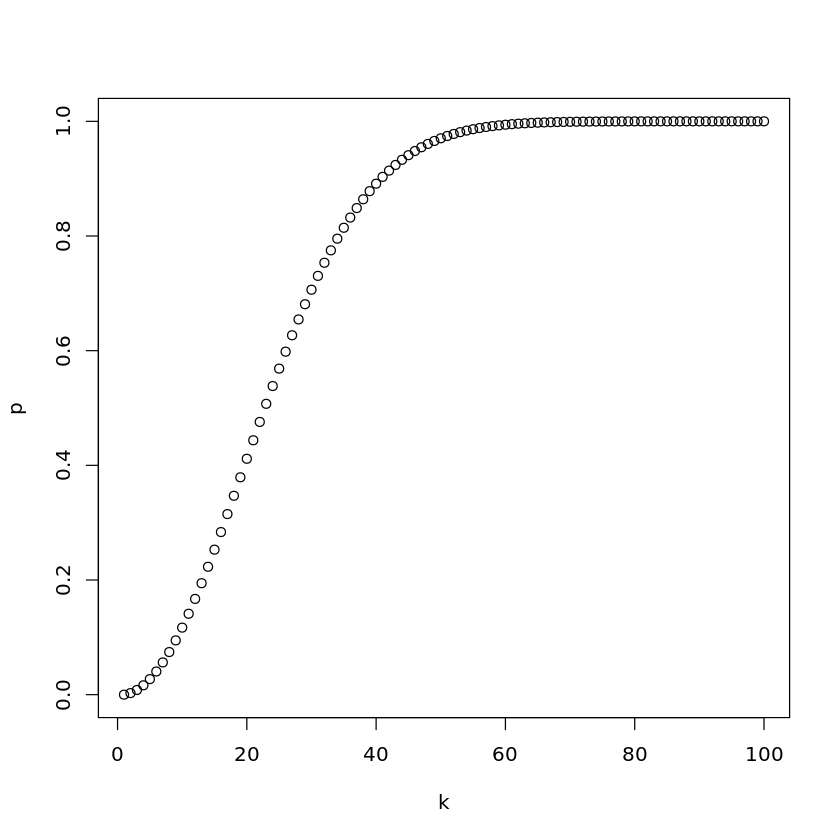

In [134]:
k <- c(1:100)
p <- lapply(k, pbirthday)
plot(k, p)